In [15]:
import librosa 
import librosa.display
import numpy as np
import scipy.io

DEFAULT_SR = 22050
SEED = 41
hop_length = 256

In [132]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = np.zeros(int(pad_duration*sr)) # silence
    frame_sz = 10000 if len(np.diff(onset_samples)) == 0 else min(np.diff(onset_samples))   # every segment has uniform frame size
    frame_sz = 10000 if frame_sz > 10000 else frame_sz
    frame_sz = 10000
    #print("fz"+str(frame_sz))
    return np.concatenate([
        np.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [129]:
def concatenate_cooky_ver(x, onset_samples, pad_duration=0.500):
    silence = np.zeros(int(pad_duration*sr)) # silence

    print(len(onset_samples))
    chop = np.zeros(0)
    for i in range(len(onset_samples)):
        
        if i == len(onset_samples)-1:
            chop = np.concatenate([chop, x[onset_samples[i]:]])
            # count += 1
            print('if')
        else :
            print('else')
            chop = np.concatenate([chop, np.concatenate([x[onset_samples[i]:onset_samples[i+1]], silence])])
    return chop

In [124]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

C:\Users\KIST\AppData\Local\Temp\ipykernel_21740\750389342.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['image.interpolation'] = None


In [9]:
y, sr = librosa.load(r"C:\Users\KIST\Desktop\이승재\Drum Loop\3-Dirty Soul (432)\DTSBK135.wav")

C:\Users\KIST\AppData\Local\Temp\ipykernel_21740\3438253775.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr)


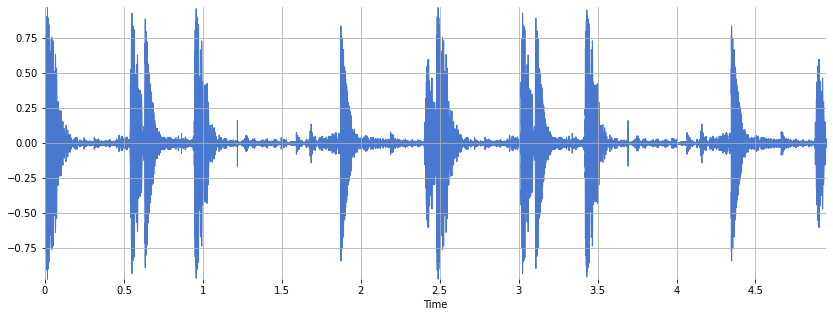

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr)

In [143]:
imsi_onset_frames = librosa.onset.onset_detect(y=y, sr=sr
            , pre_max=0, post_max=2
            , pre_avg=0, post_avg=2
            , delta=0.04
            , wait=2
            , normalize=True
            , backtrack=True
            )
onset_times = librosa.frames_to_time(imsi_onset_frames)

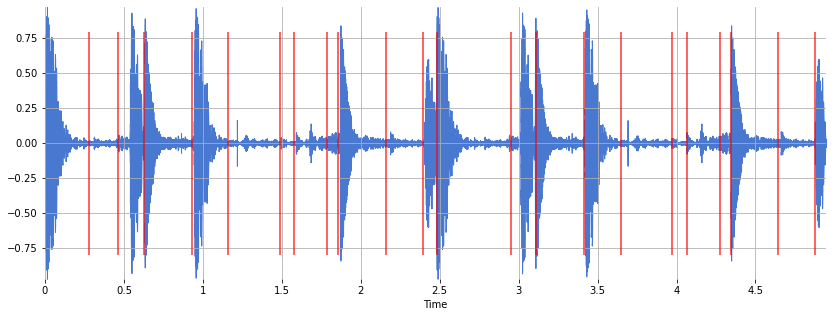

In [144]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

In [145]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)


In [146]:
clicks = librosa.clicks(frames=imsi_onset_frames, sr=sr, length=len(y))

scipy.io.wavfile.write("clickssss.wav", 22050, clicks)

In [147]:
onset_samples = librosa.frames_to_samples(imsi_onset_frames)

In [148]:
concatenated_signal = concatenate_cooky_ver(y, onset_samples, 0.200)

22
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
if


In [149]:
scipy.io.wavfile.write("cooky_chop.wav", 22050, concatenated_signal)